# HW8 - Neuronal Dynamics (Oscillating Systems)

This week we learned about the FitzHugh Nagumo model of a neuron described by the following equations:

$$\dot{v} = -v(v-a)(v-1)-w $$
$$\dot{w} = \epsilon (v - \gamma w)$$

## Question 1

Solve for the v and w nullclines, define them as functions, and plot them for $\gamma = 2$ and $\gamma = 8$. Use $\epsilon = 0.01$ and $a = 0.1$. Make sure that the X and Y limits of your plots show all relavant dynamics.



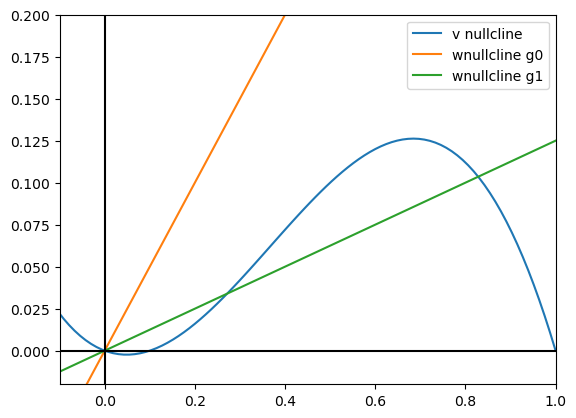

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Create function for the nullclines (dv and dw = 0)
def vnullcline(v, ag):
    w = -v*(v-ag)*(v-1)
    return(w)
def wnullcline(w, gammag):
    v = gammag*w
    return(v)

# Set the parameters for the functions
gamma = 2
gamma1 = 8
eps = 0.01
a = 0.1


v = np.linspace(-.2,1, 100)
w = np.linspace(-.1,.3, 100)

plt.plot(v, vnullcline(v,a))
plt.plot(wnullcline(w,gamma), w)
plt.plot(wnullcline(w,gamma1), w)

plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')
plt.xlim(-.1,1)
plt.ylim(-.02,.2)
plt.legend(['v nullcline', 'wnullcline g0', 'wnullcline g1'])

## Question 2

Plot the phase portraits for both of the $\gamma$ parameter values. 
How has the phase flow changed by changing $\gamma$? What happens to the set of possible state trajectories when $\gamma$ becomes large?


(-0.2, 1.25)

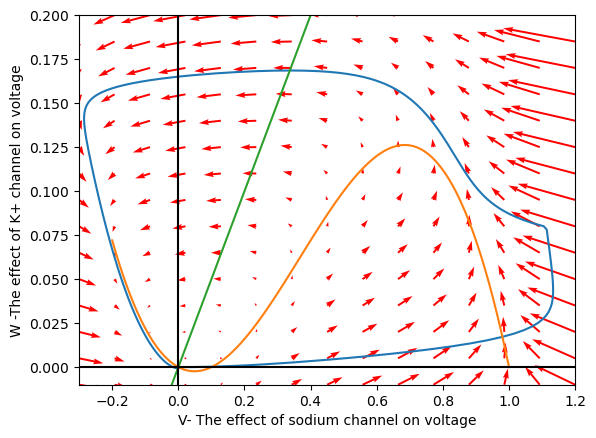

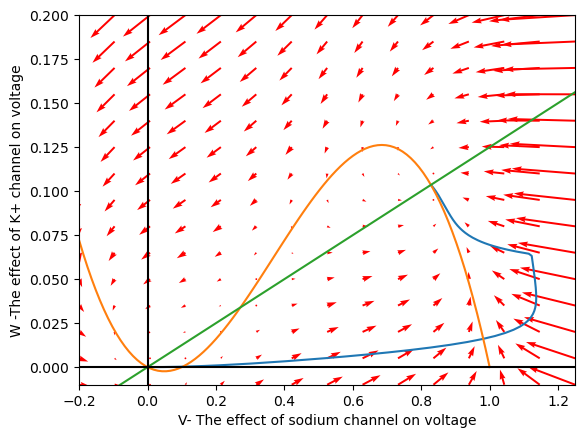

In [18]:
#Define fitzHughNagumo, Ipulse, and ComputeI functions to be able to plot trajectories on the phase portrait
def fitzHughNagumo(state, t):
    v = state[0] 
    w = state[1] 
    
    dv = -v*(v-a)*(v-1) - w + Ipulse(t, tOn, tOff, IOn, IOff)
    dw = eps*(v - gamma*w)
    
    return(dv, dw)

#Ipulse function
def Ipulse(t, tOn, tOff, IOn, IOff):
    
    if((t > tOn) & (t < tOff)):     
        I = IOn 
        
    else:        
        I = IOff
        
    return(I)

#Compute I function
def computeI(t):
    
    I = np.zeros(len(t))
    
    for i in np.arange(0, len(t), 1):
        
        I[i] = Ipulse(t[i], tOn, tOff, IOn, IOff)
        
    return(I)


#Create phase portraits with givenparameter values
gamma = 2
a = 0.1
eps = 0.01
state0 = [0,0]
tOn = 50
tOff = 60
IOn = 0.2
IOff = 0

# Plotting the phase plane
def fitzHughNagumo_NoI(state,t):
    v = state[0]
    w = state[1]
    
    dv = -v*(v-a)*(v-1) - w   
    dw = eps*(v-gamma*w)

    return(dv,dw)

xlim = [-0.3, 1.2]
ylim = [-0.01, 0.2]

npoints = 15

s1 = np.linspace(xlim[0],xlim[1],npoints)
s2 = np.linspace(ylim[0],ylim[1],npoints)

S1,S2 = np.meshgrid(s1,s2)

q,p = np.zeros(S1.shape), np.zeros(S2.shape)

NI, NJ = S1.shape

for i in range(NI):
    for j in range(NJ):
        x = S1[i,j]
        y = S2[i,j]
        
        S_dot = fitzHughNagumo_NoI([x,y],[])
        
        p[i,j] = S_dot[0]
        q[i,j] = S_dot[1]/0.1 

# Defining the trajectory
t = np.linspace(0,300,1500)
trajectory = odeint(fitzHughNagumo, state0, t)

#Plotting the phase portraits and trajectory of the given parameters
plt.plot(trajectory[:,0], trajectory[:,1])
       
plt.quiver(S1,S2,p,q, color = 'r')
plt.plot(v,vnullcline(v,a))
plt.plot(wnullcline(w,gamma),w)
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')

plt.ylabel('W -The effect of K+ channel on voltage')
plt.xlabel('V- The effect of sodium channel on voltage')

plt.ylim(ylim[0],ylim[1])
plt.xlim(xlim[0],xlim[1])

plt.figure()

# Same parameters except increasing the gamma value to 8
gamma = 8
a = 0.1
eps = 0.01
state0 = [0,0]
tOn = 50
tOff = 60
IOn = 0.2
IOff = 0

xlim = [-0.2, 1.25]
ylim = [-0.01, 0.2]

npoints = 15

s1 = np.linspace(xlim[0],xlim[1],npoints)
s2 = np.linspace(ylim[0],ylim[1],npoints)

S1,S2 = np.meshgrid(s1,s2)

q,p = np.zeros(S1.shape), np.zeros(S2.shape)

NI, NJ = S1.shape

for i in range(NI):
    for j in range(NJ):
        x = S1[i,j]
        y = S2[i,j]
        
        S_dot = fitzHughNagumo_NoI([x,y],[])
        
        p[i,j] = S_dot[0]
        q[i,j] = S_dot[1]/0.1 \
        
t = np.linspace(0,300,1500)
trajectory = odeint(fitzHughNagumo, state0, t)

#Plotting the phase portraits and trajectory of the given parameters
plt.plot(trajectory[:,0], trajectory[:,1])
       
plt.quiver(S1,S2,p,q, color = 'r')
plt.plot(v,vnullcline(v,a))
plt.plot(wnullcline(w,gamma),w)
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')

plt.ylabel('W -The effect of K+ channel on voltage')
plt.xlabel('V- The effect of sodium channel on voltage')

plt.ylim(ylim[0],ylim[1])
plt.xlim(xlim[0],xlim[1])

## What happens to the set of possible state trajectories when becomes large?
* As the gamma value increases the equilibrium point begins to change, more specifically the wnullcline shifts downward and the trajectory begins to point to this equilibrium point
* So what is happening to the possible state trajectories? The trajectory is not able to complete a full loop going through the origin and following the vectors in the phase portrait as seen in gamma = 8. In biological terms, the neuron is not able to repolarize after action potential firing rendering it in a permanent on state

## Question 3
Numerically integrate the FH equations with the addition of a step impulse.

To add a step impulse to this simulation consider that an outside change in the current $I(t)$ that effect the $\dot{v}$ so that

$$\dot{v} = -v(v-a)(v-1)-w + I(t)$$
$$\dot{w} = \epsilon (v - \gamma w)$$


* Define a new function of the FN equations with a forcing function `input(Ton,q)` where $I(t) = 0$ until `Ton` whereafter $I(t) = q$
* Simulate a sudden increase in I. Plot $v(t)$ and $w(t)$. What happens to the neuron?
* Determine the minimum value of $I$ that causes full spiking to 1 significant digit by trying different input amplitudes. 
* What is the lowest step current amplitude to 1 sig fig to generate **repetitive firing**?

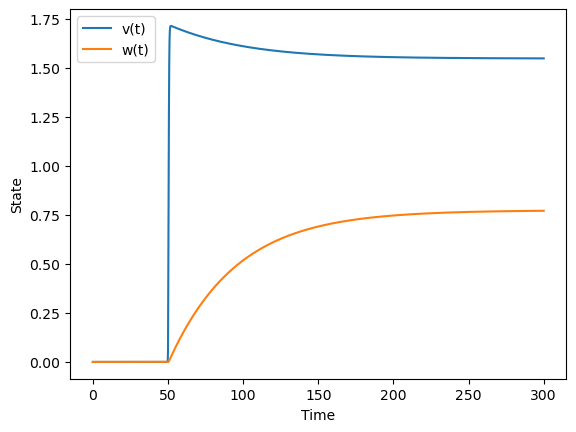

In [19]:
# Create the forcing function 'input'
def input(t, Ton, q):
    if t < Ton:
        return 0.0
    else:
        return q

# Reintroduce the fitzHugh Nagumo function with respective ODE's
def fitzHughNagumo(state, t, Ton, q):
    v = state[0]
    w = state[1]
    
    dv = -v*(v-a)*(v-1) - w + input(t, Ton, q)
    dw = eps*(v-gamma*w)
    
    return [dv, dw]

# Setting respective parameters for a sudden increase in neuron firing
eps = 0.01
a = 0.1
gamma = 2
Ton = 50
q = 2

state0 = [0,0]
t = np.linspace(0,300,1500)
state = odeint(fitzHughNagumo, state0, t, args=(Ton, q))

# Plot for a sudden increase in neuron firing (I)
plt.plot(t, state[:,0], label='v(t)')
plt.plot(t, state[:,1], label='w(t)')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.show()

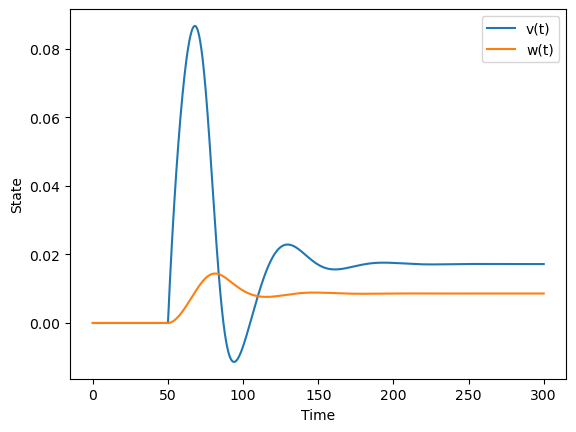

In [26]:
# Trial and error for determining the value for a maximum spike threshold
spike_threshold = 0.1 
for i in np.linspace(0, 0.01, 10):
    q = i 
    state = odeint(fitzHughNagumo, state0, t, args=(Ton, q))
    if np.max(state[:,0]) > spike_threshold:
        plt.plot(t,state[:,0])
        break 

#A minimum value of I = 0.01 was determined to cause full spiking
eps = 0.01
a = 0.1
gamma = 2
Ton = 50
q = 0.01 

state0 = [0,0]
t = np.linspace(0,300,1500)
state = odeint(fitzHughNagumo, state0, t, args=(Ton, q))

#Plotting the full spike with respect to the parameters
plt.plot(t, state[:,0], label='v(t)')
plt.plot(t, state[:,1], label='w(t)')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.show()

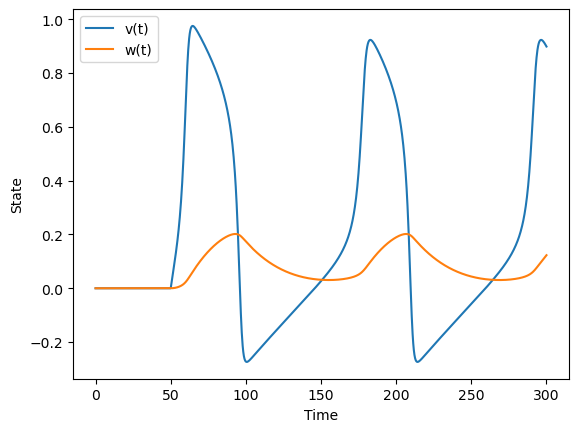

In [21]:
#Trial and error determined 0.04 was the minimum step current amplitude to cause repetitive firing of the neuron
eps = 0.01
a = 0.1
gamma = 2
Ton = 50
q = 0.04 

state0 = [0,0]
t = np.linspace(0,300,1500)
state = odeint(fitzHughNagumo, state0, t, args=(Ton, q))

# Plotting repititve neuronal firing for the respective parameters
plt.plot(t, state[:,0], label='v(t)')
plt.plot(t, state[:,1], label='w(t)')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.show()

## Question 4 - EXTRA CREDIT (not optional for grads)

Below is a more realistic simulation of a neuron from the famous Hodgkin and Huxley model. While it is more accurate it is less mathematically tractable and thus requires more simulation to get intuition. I have implemented the model with real parameters, ie. they represent real concentrations and voltages.

Here we will use a dictionary to store and alter parameter values. This maintains readability in a rather unwieldy model. Use the following line of code to change the injected voltage:
`params['E_params']['I_ext'] = 1.0e-11`

1) Simulate the neuron so that it only has leakage current and external current. In other words, comment out the terms for sodium and potassium channels. Run a simulation with an initial membrane potential of -70mv and an external current of 0mv. What happens and why?

2) Change the external current to 1e-10 and re-run the simulation. What happens and why?

3) Add back the sodium channel terms (activation and deactivation). Run a simulation with external current 1e-10 and initial states `[-70e-03, 0, 1]`. What happens and why?

4) Add back terms related to the potassium channel. Run a simulation with external current 1e-10 and initial states `[-70e-03, 0, 1, 0]`. What happens and why?

5) What is the effect of external current on neuronal firing behavior? What voltages cause full firing, and repetitive firing. Is there a minimum voltage? Plot the membrane voltage as a function of time to show that this is true. 

In [3]:
# set up a dictionary of parameters so that we can index by name

import numpy as np
from scipy.integrate import odeint
import scipy as sp
import matplotlib.pyplot as plt
import math as m



E_params = {
        'E_leak' : -7.0e-2,
        'G_leak' : 3.0e-09,
        'C_m'    : 3.0e-11,
        'I_ext'  : 1.0e-2
}

Na_params = {
        'Na_E'          : 5.0e-2,
        'Na_G'          : 1.0e-6,
        'k_Na_act'      : 3.0e+0,
        'A_alpha_m_act' : 2.0e+5,
        'B_alpha_m_act' : -4.0e-2,
        'C_alpha_m_act' : 1.0e-3,
        'A_beta_m_act'  : 6.0e+4,
        'B_beta_m_act'  : -4.9e-2,
        'C_beta_m_act'  : 2.0e-2,
        'l_Na_inact'    : 1.0e+0,
        'A_alpha_m_inact' : 8.0e+4,
        'B_alpha_m_inact' : -4.0e-2,
        'C_alpha_m_inact' : 1.0e-3,
        'A_beta_m_inact'  : 4.0e+2,
        'B_beta_m_inact'  : -3.6e-2,
        'C_beta_m_inact'  : 2.0e-3
}

K_params = {
        'k_E'           : -9.0e-2,
        'k_G'           : 2.0e-7,
        'k_K'           : 4.0e+0,
        'A_alpha_m_act' : 2.0e+4,
        'B_alpha_m_act' : -3.1e-2,
        'C_alpha_m_act' : 8.0e-4,
        'A_beta_m_act'  : 5.0e+3,
        'B_beta_m_act'  : -2.8e-2,
        'C_beta_m_act'  : 4.0e-4
}

params = {
        'E_params'  : E_params,
        'Na_params' : Na_params,
        'K_params'  : K_params
}

#Example of how to index the dicts
print(E_params['E_leak'])
print(K_params['k_K'])


def neuron(state, t, params):
        """
         Purpose: simulate Hodgkin and Huxley model for the action potential using
         the equations from Ekeberg et al, Biol Cyb, 1991.
         Input: state ([E m h n] (ie [membrane potential; activation of
                  Na++ channel; inactivation of Na++ channel; activation of K+
                  channel]),
                t (time),
                and the params (parameters of neuron; see Ekeberg et al).
         Output: statep (state derivatives).
        """

        E = state[0]
        m = state[1]
        h = state[2]
        n = state[3]

        Epar = params['E_params']
        Na   = params['Na_params']
        K    = params['K_params']

        # external current (from "voltage clamp", other compartments, other neurons, etc)
        I_ext = Epar['I_ext']

        # calculate Na rate functions and I_Na
        alpha_act = Na['A_alpha_m_act'] * (E-Na['B_alpha_m_act']) / (1.0 - np.exp((Na['B_alpha_m_act']-E) / Na['C_alpha_m_act']))
        beta_act = Na['A_beta_m_act'] * (Na['B_beta_m_act']-E) / (1.0 - np.exp((E-Na['B_beta_m_act']) / Na['C_beta_m_act']) )
        dmdt = ( alpha_act * (1.0 - m) ) - ( beta_act * m )

        alpha_inact = Na['A_alpha_m_inact'] * (Na['B_alpha_m_inact']-E) / (1.0 - np.exp((E-Na['B_alpha_m_inact']) / Na['C_alpha_m_inact']))
        beta_inact  = Na['A_beta_m_inact'] / (1.0 + (np.exp((Na['B_beta_m_inact']-E) / Na['C_beta_m_inact'])))
        dhdt = ( alpha_inact*(1.0 - h) ) - ( beta_inact*h )

        # Na-current:
        I_Na =(Na['Na_E']-E) * Na['Na_G'] * (m**Na['k_Na_act']) * h

        # calculate K rate functions and I_K
        alpha_kal = K['A_alpha_m_act'] * (E-K['B_alpha_m_act']) / (1.0 - np.exp((K['B_alpha_m_act']-E) / K['C_alpha_m_act']))
        beta_kal = K['A_beta_m_act'] * (K['B_beta_m_act']-E) / (1.0 - np.exp((E-K['B_beta_m_act']) / K['C_beta_m_act']))
        dndt = ( alpha_kal*(1.0 - n) ) - ( beta_kal*n )
        I_K = (K['k_E']-E) * K['k_G'] * n**K['k_K']

        # leak current
        I_leak = (Epar['E_leak']-E) * Epar['G_leak']

        # calculate derivative of E
        dEdt = (I_leak + I_K + I_Na + I_ext) / Epar['C_m']
        statep = [dEdt, dmdt, dhdt, dndt]

        return statep

-0.07
4.0


In [14]:

# set initial states and time vector
state0 = [-70e-03, 0, 1, 0]
t = np.arange(0, 0.2, 0.001)

# let's inject some external current
#params['E_params']['I_ext'] = #Enter parameter value here

# run simulation
state = odeint(neuron, state0, t, args=(params,))

#### Who did you work with?
